In [320]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [322]:
# Read data set
df1 = pd.read_csv("Downloads/housingprices.csv")
df1.head()

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,...,STATUS,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
0,"In accordance with local MLS rules, some MLS l...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PAST SALE,NaN,Single Family Residential,11608 Everston St,Norwalk,CA,90650,420000.0,3.0,1.0,...,NaN,NaN,NaN,https://www.redfin.com/CA/Norwalk/11608-Everst...,NaN,NaN,N,Y,33.897497,-118.085962
2,PAST SALE,NaN,Condo/Co-op,20134 Leadwell St #314,Winnetka,CA,91306,415000.0,2.0,2.0,...,NaN,NaN,NaN,https://www.redfin.com/CA/Winnetka/20134-Leadw...,NaN,NaN,N,Y,34.203220,-118.572588
3,PAST SALE,March-19-2025,Condo/Co-op,730 W 4th St #108,Long Beach,CA,90802,410000.0,1.0,2.0,...,Sold,NaN,NaN,https://www.redfin.com/CA/Long-Beach/730-W-4th...,CRMLS,PW25054577,N,Y,33.771293,-118.201627
4,PAST SALE,NaN,Single Family Residential,648 E 75th St,Los Angeles,CA,90001,415000.0,2.0,1.0,...,NaN,NaN,NaN,https://www.redfin.com/CA/Los-Angeles/648-E-75...,NaN,NaN,N,Y,33.971871,-118.263439


In [324]:
df1.columns

Index(['SALE TYPE', 'SOLD DATE', 'PROPERTY TYPE', 'ADDRESS', 'CITY',
       'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'PRICE', 'BEDS', 'BATHS',
       'LOCATION', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET',
       '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME',
       'NEXT OPEN HOUSE END TIME',
       'URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)',
       'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [326]:
df2 = df1.drop(['SALE TYPE','SOLD DATE', 'ADDRESS','STATE OR PROVINCE',
                 'LOCATION', 'ZIP OR POSTAL CODE', 'DAYS ON MARKET',
                'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME',
       'NEXT OPEN HOUSE END TIME',
       'URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)',
                'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'LATITUDE', 'LONGITUDE','$/SQUARE FEET'
               ], axis='columns')
df2.head(20)

,PROPERTY TYPE,CITY,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Single Family Residential,Norwalk,420000.0,3.0,1.0,1122.0,5938.0,1950.0
2,Condo/Co-op,Winnetka,415000.0,2.0,2.0,884.0,NaN,1971.0
3,Condo/Co-op,Long Beach,410000.0,1.0,2.0,584.0,32286.0,1987.0
4,Single Family Residential,Los Angeles,415000.0,2.0,1.0,1166.0,5102.0,1923.0
5,Condo/Co-op,Long Beach,415000.0,1.0,1.0,687.0,NaN,1958.0
6,Single Family Residential,Littlerock,420000.0,3.0,2.0,1247.0,8105.0,1979.0
7,Multi-Family (2-4 Unit),Littlerock,405000.0,1.0,2.0,820.0,40071.0,1954.0
8,Single Family Residential,Lancaster,405000.0,4.0,2.0,1464.0,9331.0,1955.0
9,Single Family Residential,Littlerock,409000.0,3.0,2.0,1050.0,33475.0,1983.0


In [328]:
df2.isnull().sum()

PROPERTY TYPE      91
CITY              111
PRICE              91
BEDS              234
BATHS             248
SQUARE FEET       267
LOT SIZE         2873
YEAR BUILT        279
dtype: int64

In [330]:
df2.shape

(29201, 8)

In [332]:
df3 = df2.dropna()
df3.isnull().sum()

PROPERTY TYPE    0
CITY             0
PRICE            0
BEDS             0
BATHS            0
SQUARE FEET      0
LOT SIZE         0
YEAR BUILT       0
dtype: int64

In [334]:
df3['BATHS'].unique()

array([ 1. ,  2. ,  3. ,  1.5,  2.5,  4. ,  3.5,  6. ,  8. ,  7. ,  5. ,
        4.5,  5.5,  7.5,  6.5,  9. , 12. , 14. , 28. , 22. ,  9.5,  8.5,
       10. , 11. , 10.5])

In [336]:
len(df3.CITY.unique())

263

In [338]:
df4 = df3.copy()
df4.CITY = df4.CITY.apply(lambda x: x.strip())
city_stats = df4.groupby("CITY")["CITY"].agg("count").sort_values(ascending = False)
city_stats

CITY
Los Angeles                3477
Long Beach                  984
Lancaster                   813
Palmdale                    624
Whittier                    420
                           ... 
San Pedro (los Angeles)       1
Lake Forest (el Toro)         1
Lennox                        1
Glassell Park                 1
Pacoima (los Angeles)         1
Name: CITY, Length: 263, dtype: int64

In [340]:
len(city_stats[city_stats <= 10])

80

In [342]:
city_stats_less_than_10 = city_stats[city_stats<=10]
df4.CITY = df4.CITY.apply(lambda x: "other" if x in city_stats_less_than_10 else x)
len(df4.CITY.unique())

184

In [344]:
df4.groupby('BATHS')['BATHS'].agg('count')



BATHS
1.0      3696
1.5       868
2.0     10137
2.5      3312
3.0      4699
3.5      1022
4.0       920
4.5       566
5.0       331
5.5       260
6.0       161
6.5        67
7.0        56
7.5        16
8.0        27
8.5         9
9.0        11
9.5         5
10.0        2
10.5        2
11.0        2
12.0        4
14.0        1
22.0        1
28.0        1
Name: BATHS, dtype: int64

In [346]:
df4['SQUARE FEET']
df4 = df4[df4['SQUARE FEET'] > 1]
df4.groupby('SQUARE FEET')['SQUARE FEET'].agg('count')

SQUARE FEET
210.0      1
288.0      1
290.0      1
300.0      1
330.0      1
          ..
13365.0    1
14609.0    1
15292.0    1
16080.0    1
25648.0    1
Name: SQUARE FEET, Length: 3963, dtype: int64

In [348]:
df4[df4['SQUARE FEET'] / df4.BEDS < 50].head()

,PROPERTY TYPE,CITY,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT


In [350]:
df6 = df4[df4['SQUARE FEET'] / df4['BEDS'] >= 50]
df6.shape

(26172, 8)

In [352]:
def remove_price_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby("CITY"):
        m = np.mean(subdf.PRICE)
        st = np.std(subdf.PRICE)
        reduced_df = subdf[(subdf.PRICE > (m - st)) & (subdf.PRICE <= (m + st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

In [354]:
df7 = remove_price_outliers(df6)
df8 = df7.drop_duplicates()
df8.head(20)

,PROPERTY TYPE,CITY,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT
0,Single Family Residential,Acton,620000.0,3.0,2.0,1760.0,107850.0,1991.0
3,Single Family Residential,Acton,645000.0,2.0,2.0,1800.0,121564.0,1983.0
4,Single Family Residential,Acton,640000.0,3.0,2.0,1300.0,221284.0,1969.0
5,Single Family Residential,Acton,639000.0,4.0,4.0,2259.0,209579.0,1993.0
6,Single Family Residential,Acton,720000.0,4.0,2.0,1477.0,112070.0,1985.0
7,Single Family Residential,Acton,730000.0,4.0,2.5,2194.0,455865.0,1989.0
8,Single Family Residential,Acton,754000.0,3.0,2.0,1803.0,108900.0,1971.0
9,Single Family Residential,Acton,777000.0,2.0,2.0,1272.0,152821.0,1990.0
10,Single Family Residential,Acton,795000.0,4.0,2.5,2547.0,212927.0,1992.0
11,Single Family Residential,Acton,840000.0,4.0,2.0,2056.0,39985.0,1989.0


In [356]:
df8.shape

(20088, 8)

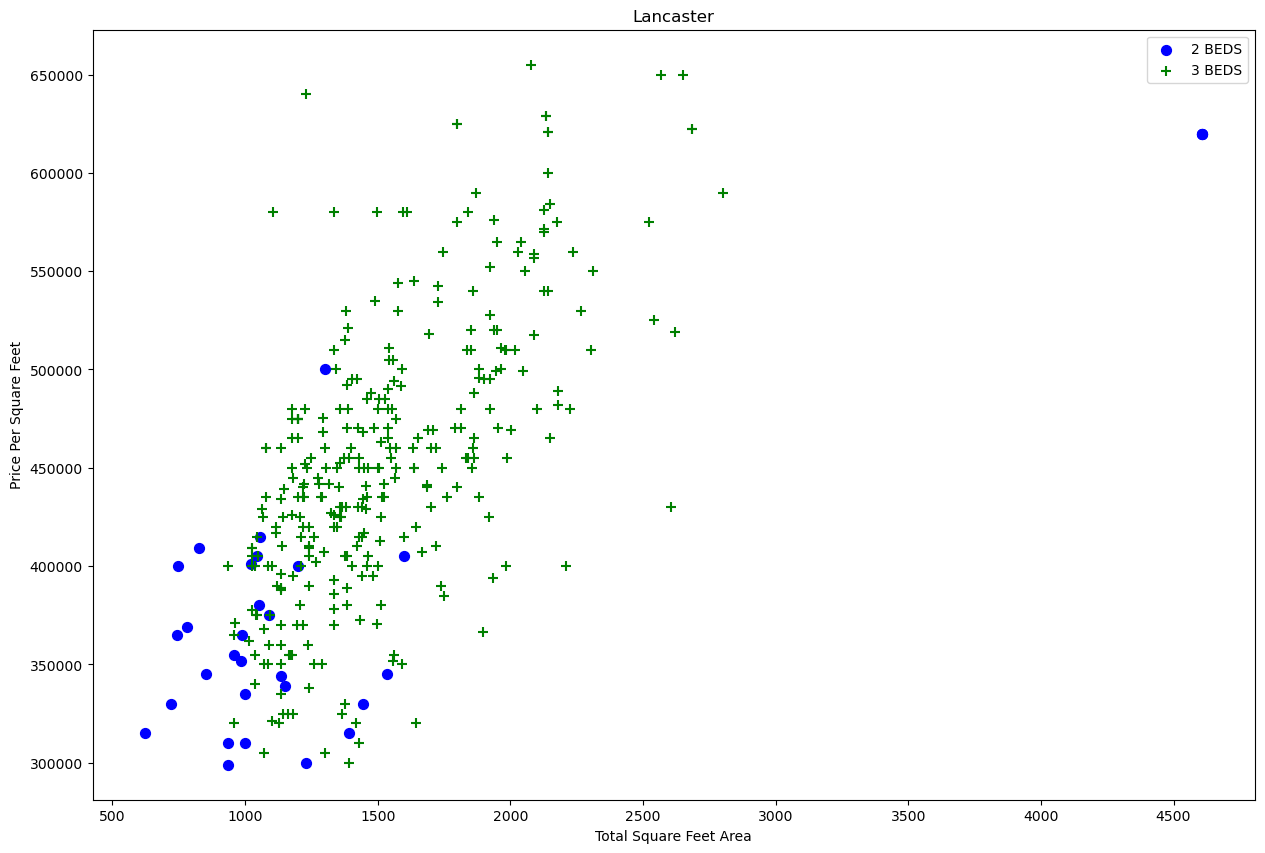

In [358]:
# create scatter plot to visualize 3 bhk costing less than 2 bhk 
def plot_scatter_chart(df,CITY):
    beds2 = df[(df.CITY == CITY) & (df.BEDS == 2)]
    beds3 = df[(df.CITY == CITY) & (df.BEDS == 3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(beds2['SQUARE FEET'], beds2.PRICE, color= 'blue', label = '2 BEDS', s = 50)
    plt.scatter(beds3['SQUARE FEET'], beds3.PRICE, marker = '+', color='green',label='3 BEDS', s = 50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title(CITY)
    plt.legend()
    
plt.show(plot_scatter_chart(df7,"Lancaster"))

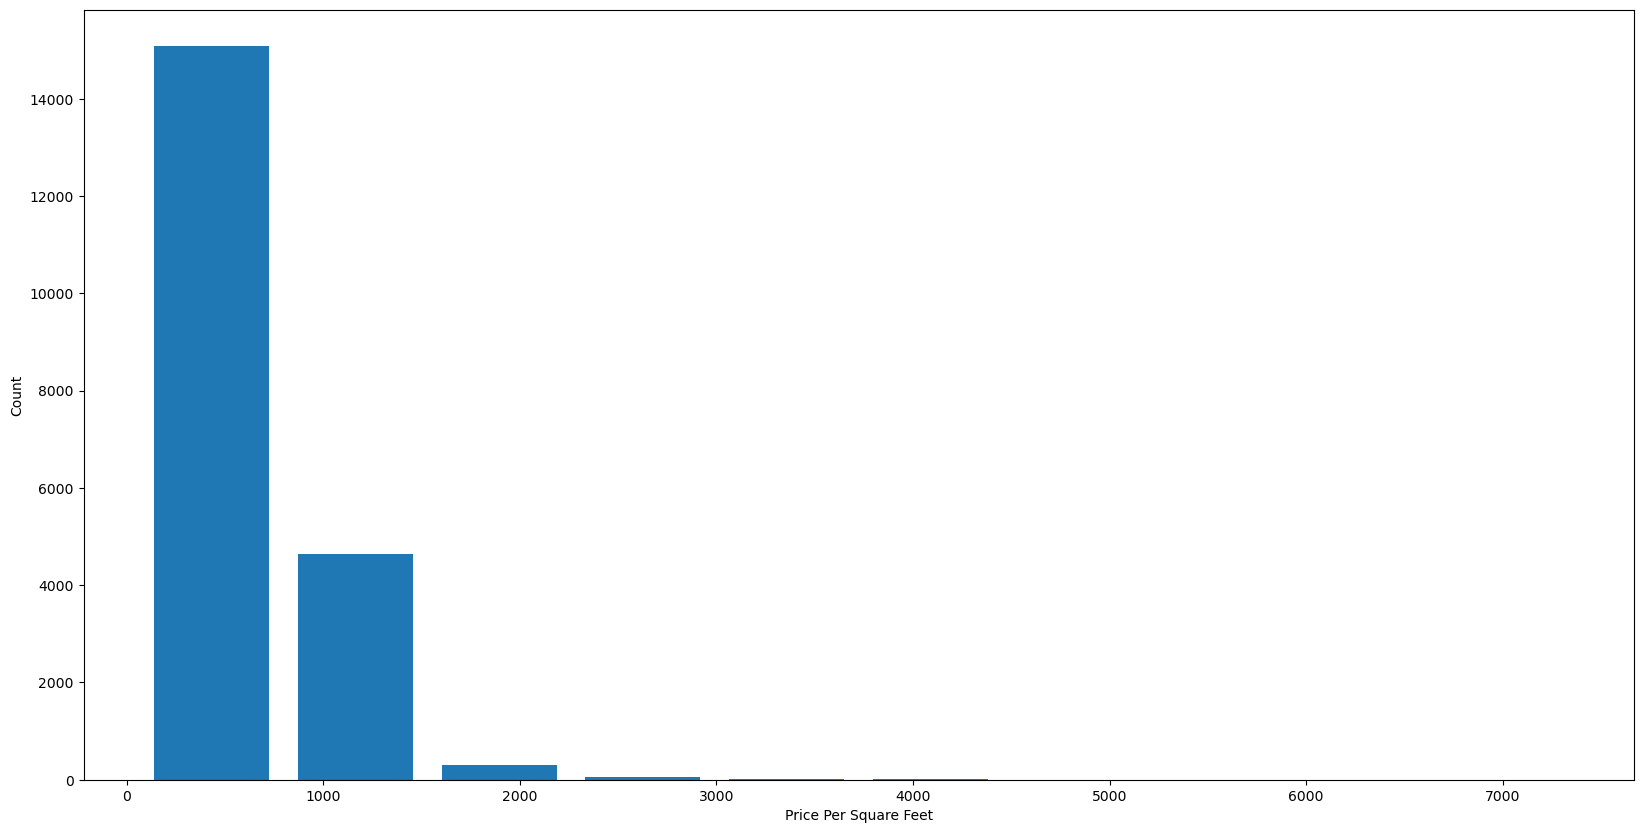

In [360]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.PRICE/df8['SQUARE FEET'], rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")
plt.show()

In [362]:
df8.BATHS.unique()

array([ 2. ,  4. ,  2.5,  3. ,  4.5,  1.5,  5. ,  1. ,  3.5,  7.5,  6. ,
        5.5,  6.5,  9. ,  8. ,  7. , 12. , 10.5])

In [364]:
df8[df8.BATHS > 10]

,PROPERTY TYPE,CITY,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT
11261,Single Family Residential,Los Angeles,1750000.0,12.0,12.0,16080.0,6998.0,1920.0
16112,Single Family Residential,San Juan Capistrano,3320000.0,9.0,10.5,9284.0,15478.0,2019.0


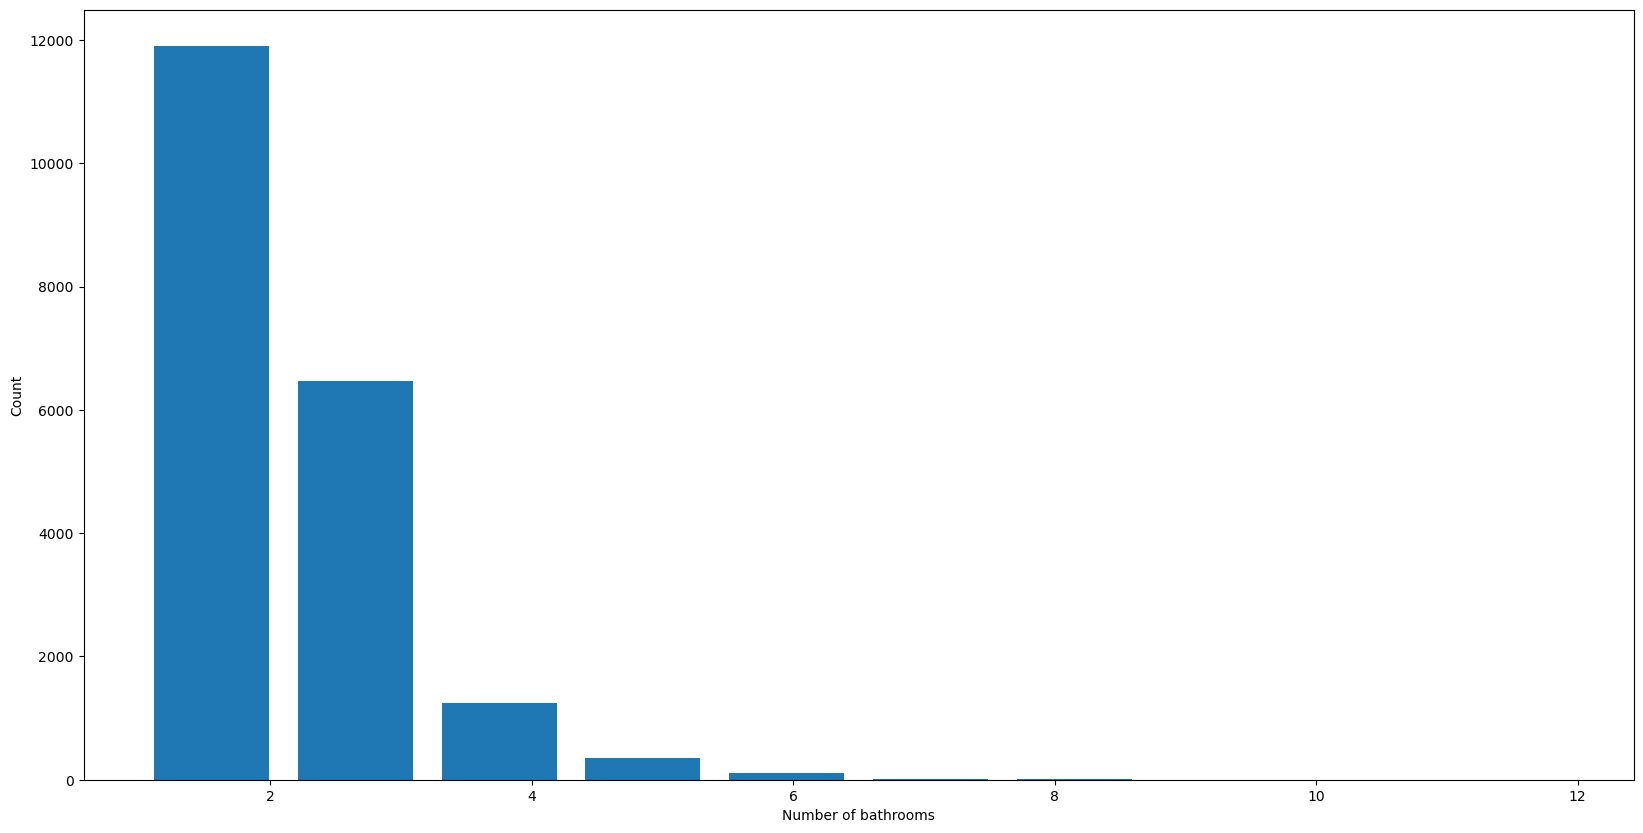

In [366]:
plt.hist(df8.BATHS, rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")
plt.show()

In [368]:
df9 = df8[df8.BATHS < df8.BEDS + 2]
df10 = df9[df9.BEDS > 0]


In [370]:
df10.groupby('BEDS')['BEDS'].agg('count')

BEDS
1.0      501
2.0     3940
3.0     9258
4.0     5038
5.0     1068
6.0      169
7.0       35
8.0       12
9.0        2
10.0       3
11.0       1
12.0       2
13.0       1
Name: BEDS, dtype: int64

In [372]:
df10.head(20)

,PROPERTY TYPE,CITY,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT
0,Single Family Residential,Acton,620000.0,3.0,2.0,1760.0,107850.0,1991.0
3,Single Family Residential,Acton,645000.0,2.0,2.0,1800.0,121564.0,1983.0
4,Single Family Residential,Acton,640000.0,3.0,2.0,1300.0,221284.0,1969.0
5,Single Family Residential,Acton,639000.0,4.0,4.0,2259.0,209579.0,1993.0
6,Single Family Residential,Acton,720000.0,4.0,2.0,1477.0,112070.0,1985.0
7,Single Family Residential,Acton,730000.0,4.0,2.5,2194.0,455865.0,1989.0
8,Single Family Residential,Acton,754000.0,3.0,2.0,1803.0,108900.0,1971.0
9,Single Family Residential,Acton,777000.0,2.0,2.0,1272.0,152821.0,1990.0
10,Single Family Residential,Acton,795000.0,4.0,2.5,2547.0,212927.0,1992.0
11,Single Family Residential,Acton,840000.0,4.0,2.0,2056.0,39985.0,1989.0


In [374]:
dummies = pd.get_dummies(df10.CITY, dtype=int)
dummies.head(3)


,Acton,Agoura Hills,Agua Dulce,Alhambra,Aliso Viejo,Altadena,Anaheim,Anaheim Hills,Arcadia,Arleta,...,West Hills,West Hollywood,Westlake Village,Westminster,Whittier,Wilmington,Winnetka,Woodland Hills,Yorba Linda,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [376]:
df11 = pd.concat([df10,dummies.drop("other", axis= "columns")], axis= "columns")


In [378]:
df12 = df11.drop("CITY", axis="columns")
df12.head(2)

,PROPERTY TYPE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,Acton,Agoura Hills,Agua Dulce,...,West Covina,West Hills,West Hollywood,Westlake Village,Westminster,Whittier,Wilmington,Winnetka,Woodland Hills,Yorba Linda
0,Single Family Residential,620000.0,3.0,2.0,1760.0,107850.0,1991.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Single Family Residential,645000.0,2.0,2.0,1800.0,121564.0,1983.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [380]:
# 1. Create dummies
dummies = pd.get_dummies(df12['PROPERTY TYPE'], dtype=int)

# 2. Drop the original 'PROPERTY TYPE' column
df12 = df12.drop('PROPERTY TYPE', axis=1)

# 3. Concatenate the dummies
df13 = pd.concat([df12, dummies], axis='columns')


In [382]:
dummies.head()

,Condo/Co-op,Mobile/Manufactured Home,Multi-Family (2-4 Unit),Multi-Family (5+ Unit),Single Family Residential,Townhouse
0,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0
5,0,0,0,0,1,0
6,0,0,0,0,1,0


In [384]:
df13 = df12.drop("PROPERTY TYPE", axis="columns")
df13.head(2)

KeyError: "['PROPERTY TYPE'] not found in axis"

In [386]:
# Remove top 1% of houses by price:
cutoff_1 = df13['PRICE'].quantile(0.99)
df_1_removed = df13[df13['PRICE'] <= cutoff_1]
print("Rows removed for 1% cutoff:", len(df13) - len(df_1_removed))
print("New df shape (1% removed):", df_1_removed.shape)

Rows removed for 1% cutoff: 201
New df shape (1% removed): (19829, 195)


In [388]:
# Remove top 5% of houses by price:
cutoff_5 = df13['PRICE'].quantile(0.95)
df_5_removed = df13[df13['PRICE'] <= cutoff_5]
print("Rows removed for 5% cutoff:", len(df13) - len(df_5_removed))
print("New df shape (5% removed):", df_5_removed.shape)


Rows removed for 5% cutoff: 1002
New df shape (5% removed): (19028, 195)


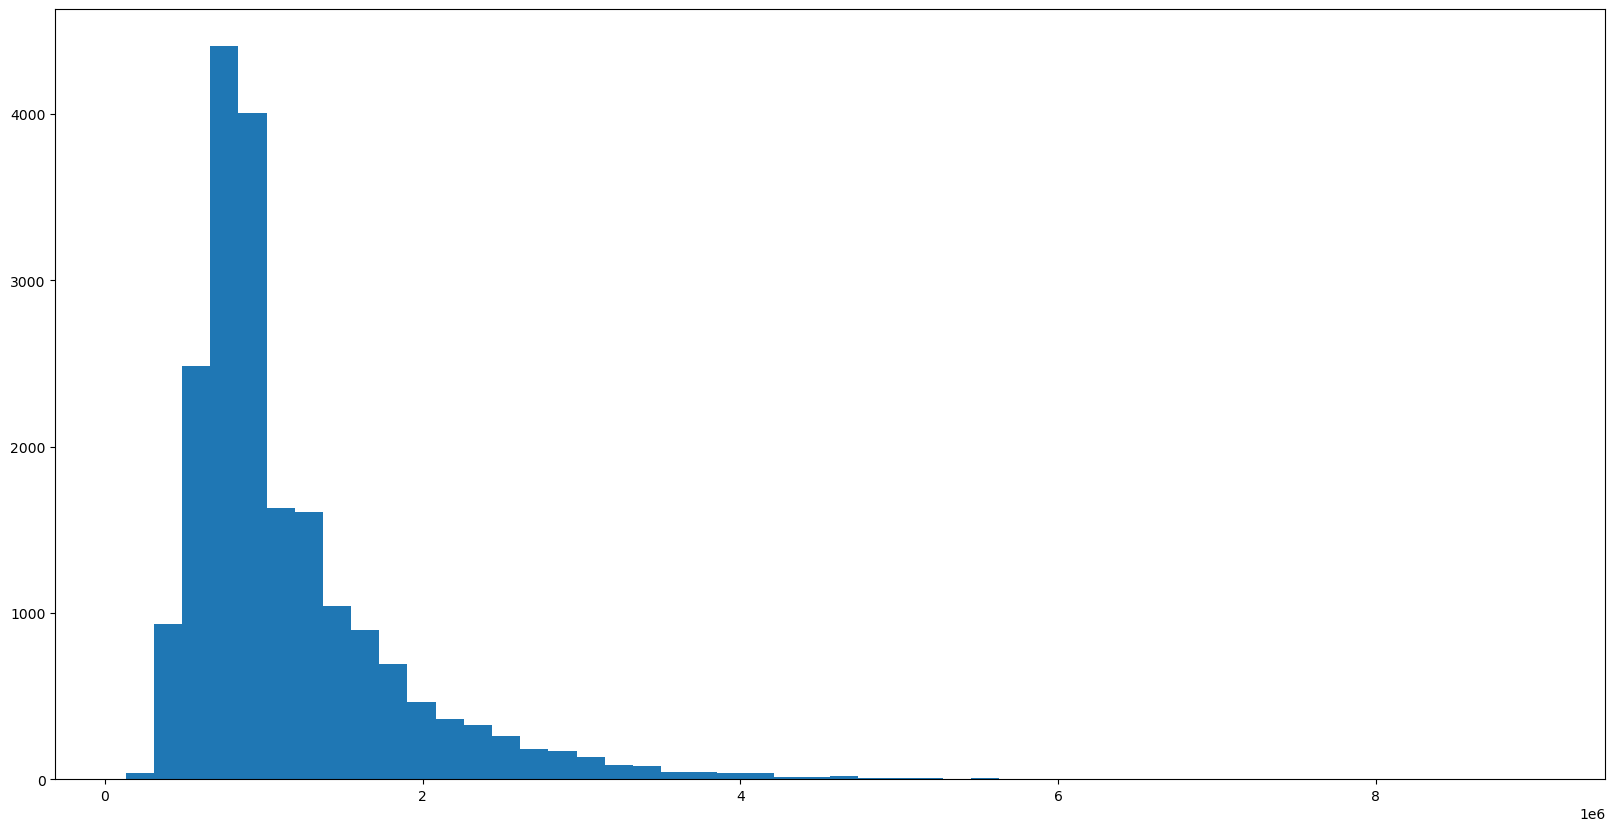

In [390]:
import matplotlib.pyplot as plt
plt.hist(df13['PRICE'], bins=50)
plt.show()


In [392]:
import numpy as np
df13['log_price'] = np.log1p(df13['PRICE'])
df13.shape

(20030, 196)

In [394]:
import numpy as np
skew_val = df13['PRICE'].skew()
print("Skewness of PRICE:", skew_val)


Skewness of PRICE: 2.4482620079859267


In [396]:
df_5_removed.loc[:, 'log_price'] = np.log1p(df_5_removed['PRICE'])

C:\Users\Boxi Lin\AppData\Local\Temp\ipykernel_31100\3872470739.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_5_removed.loc[:, 'log_price'] = np.log1p(df_5_removed['PRICE'])


In [398]:
X = df_5_removed.drop(['PRICE', 'log_price'], axis='columns')
X = X.drop('LOT SIZE', axis=1)
y = df_5_removed['log_price']

In [401]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [403]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test,y_test)

0.7545613908075551

In [405]:
from sklearn.metrics import mean_squared_error, r2_score

y_test_pred_log = lr_clf.predict(X_test)
mse_log = mean_squared_error(y_test, y_test_pred_log)
r2_log = r2_score(y_test, y_test_pred_log)

print("MSE in log-space:", mse_log)
print("R² in log-space:", r2_log)


MSE in log-space: 0.043412623999469435
R² in log-space: 0.7545613908075551


In [407]:
import numpy as np

y_test_pred = np.expm1(y_test_pred_log)  # inverse of log1p
y_test_actual = np.expm1(y_test)         # for actual test values

# Then compute metrics in original price space:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae_price = mean_absolute_error(y_test_actual, y_test_pred)
mse_price = mean_squared_error(y_test_actual, y_test_pred)
rmse_price = np.sqrt(mse_price)
r2_price = r2_score(y_test_actual, y_test_pred)

print("MAE in price space:", mae_price)
print("RMSE in price space:", rmse_price)
print("R² in price space:", r2_price)


MAE in price space: 161264.00545187955
RMSE in price space: 246858.94812623697
R² in price space: 0.7171057300268252


In [409]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.74416242, 0.75603408, 0.72434666, 0.71252378, 0.76214964])

In [411]:
def predict_price(city, property_type, sqft, bath, beds, year_built, model, X_columns):
    import numpy as np
    
    # Create a zero vector with length equal to the number of features.
    x = np.zeros(len(X_columns))
    
    # Assign numeric features using the uppercase keys as in training.
    if 'SQUARE FEET' in X_columns:
        x[X_columns.get_loc('SQUARE FEET')] = sqft
    if 'BATHS' in X_columns:
        x[X_columns.get_loc('BATHS')] = bath
    if 'BEDS' in X_columns:
        x[X_columns.get_loc('BEDS')] = beds
    if 'YEAR BUILT' in X_columns:
        x[X_columns.get_loc('YEAR BUILT')] = year_built

    # One-hot encode the city.
    if city in X_columns:
        x[X_columns.get_loc(city)] = 1
    else:
        print(f"Warning: City '{city}' not found in training data.")

    # One-hot encode the property type.
    if property_type in X_columns:
        x[X_columns.get_loc(property_type)] = 1
    else:
        print(f"Warning: Property type '{property_type}' not found in training data.")

    # Predict log(price) using the model.
    predicted_log_price = model.predict([x])[0]
    # Convert from log(price) to price.
    predicted_price = np.expm1(predicted_log_price)
    
    return round(predicted_price, 2)


In [413]:
predict_price(
    city="Irvine",
    property_type="Townhouse",
    sqft=1200,
    bath=2,
    beds=2,
    year_built=1977,
    model=lr_clf,
    X_columns=X.columns
)

C:\Users\Boxi Lin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


1190035.96

In [415]:
dummies.head()

,Condo/Co-op,Mobile/Manufactured Home,Multi-Family (2-4 Unit),Multi-Family (5+ Unit),Single Family Residential,Townhouse
0,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0
5,0,0,0,0,1,0
6,0,0,0,0,1,0


In [417]:
predict_price('Rowland Heights', 'Single Family Residential', 1300, 2, 3, 1940,model=lr_clf, X_columns=X.columns)


C:\Users\Boxi Lin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


831320.49

In [419]:
import pickle
with open('la_county_prices_model.pickle', 'wb') as f:
    pickle.dump(lr_clf, f)

In [421]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json", "w") as f:
    f.write(json.dumps(columns))